In [1]:
import numpy as np
import random
import scipy.interpolate as interp
import matplotlib.pyplot as plt
H_in_kJmol = 2625.499639
R = 8.314 # J/(K*mol)
T = 300   # K
RT = R*T/1000.0 # kJ / mol
RT_au = RT/2625.5
kB          = 1.380648e-23      # J / K
H_to_J      = 4.359744e-18      #
kB_a        = kB / H_to_J       # Hartree / K

In [13]:
def get_F(dat, x):
    dx = x[1]-x[0]
    prob_surface = np.exp(dat/RT_au)
    prob_surface /= prob_surface.sum()*dx
    F = RT*np.log(prob_surface, out=np.zeros_like(prob_surface), where=(prob_surface!=0))
    prob_surface = np.exp(F/RT)
    #prob_surface /= prob_surface.sum()*dx
    return (prob_surface,F)

In [14]:
ABF_1 = np.loadtxt('ABF/bias_out_1.dat', skiprows=1)
ABF_2 = np.loadtxt('ABF/bias_out_2.dat', skiprows=1)
x1 = ABF_1[:,0]
(P1,ABF_F1) = get_F(ABF_1[:,3], x1)
x2 = ABF_2[:,0]
(P2,ABF_F2) = get_F(ABF_2[:,3], x2)

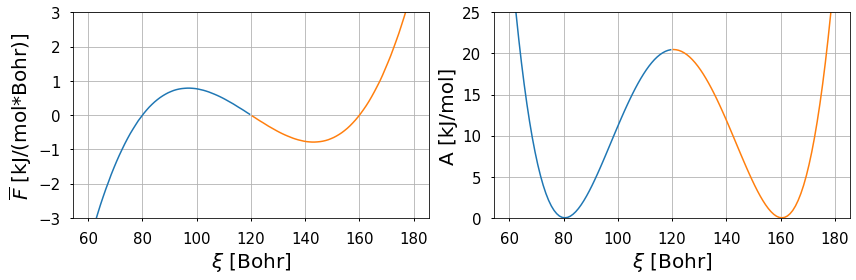

In [54]:
plt.rcParams["figure.figsize"] = [12,4]
fig, axs = plt.subplots(ncols=2)

axs[0].plot(x1, ABF_1[:,2]*H_in_kJmol)
axs[0].plot(x2, ABF_2[:,2]*H_in_kJmol)
axs[0].grid()
axs[0].set_xlabel(r'$\xi$ [Bohr]', fontsize=20)
axs[0].set_ylabel(r'$\overline{F}$ [kJ/(mol*Bohr)]', fontsize=20)
axs[0].set_ylim([-3,3])

axs[1].plot(x1, ABF_F1-ABF_F1.min())
axs[1].plot(x2, ABF_F2-ABF_F2.min())
axs[1].grid()
axs[1].set_xlabel(r'$\xi$ [Bohr]', fontsize=20)
axs[1].set_ylabel('A [kJ/mol]', fontsize=20)
axs[1].set_ylim([0,25])

for ind, ax in enumerate(axs):
    ax.tick_params(axis='x',length=3,width=1,labelsize=15, pad=10, direction='out')
    ax.tick_params(axis='y',length=3,width=1,labelsize=15, pad=10, direction='out')

plt.tight_layout()
plt.savefig("ABF_stratification.png", dpi=400)
plt.show()
plt.close()

In [11]:
eABF_1 = np.loadtxt('eABF/bias_out_1.dat', skiprows=1)
eABF_2 = np.loadtxt('eABF/bias_out_2.dat', skiprows=1)
xx1 = eABF_1[:,0]
eABF_F1 = get_F(eABF_1[:,3], xx1)
xx2 = eABF_2[:,0]
eABF_F2 = get_F(eABF_2[:,3], xx2)

ValueError: x and y must have same first dimension, but have shapes (30,) and (2, 30)

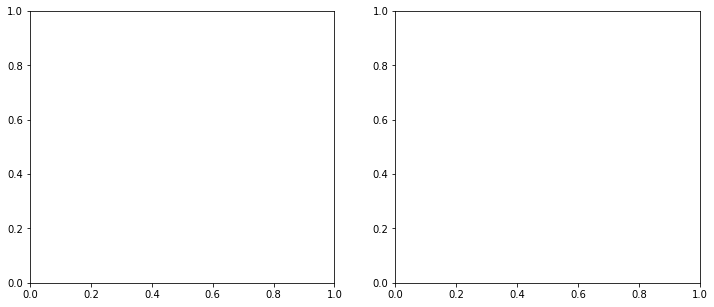

In [12]:
plt.rcParams["figure.figsize"] = [12,5]
fig, axs = plt.subplots(ncols=2)
axs[0].plot(xx1, eABF_F1)
axs[0].plot(xx2, eABF_F2)
axs[1].plot(xx1, eABF_F1-eABF_F1.min())
axs[1].plot(xx2, eABF_F2-eABF_F2.min())
axs[0].grid()
axs[1].grid()
axs[0].set_xlabel('x [Bohr]')
axs[1].set_xlabel('x [Bohr]')
axs[0].set_ylabel('free Energy [kJ/mol]')
axs[1].set_ylabel('free Energy [kJ/mol]')
axs[0].set_title('eABF, (sum(P(x)dx)=1)')
axs[1].set_title('eABF')
plt.tight_layout()
plt.savefig("eABF_P1_windows.png", dpi=400)
plt.show()
plt.close()

In [8]:
meABF_1 = np.loadtxt('meta_eABF/bias_out_1.dat', skiprows=1)
meABF_2 = np.loadtxt('meta_eABF/bias_out_2.dat', skiprows=1)
xxx1 = meABF_1[:,0]
meABF_F1 = get_F(meABF_1[:,3], xxx1)
xxx2 = eABF_2[:,0]
meABF_F2 = get_F(meABF_2[:,3], xxx2)

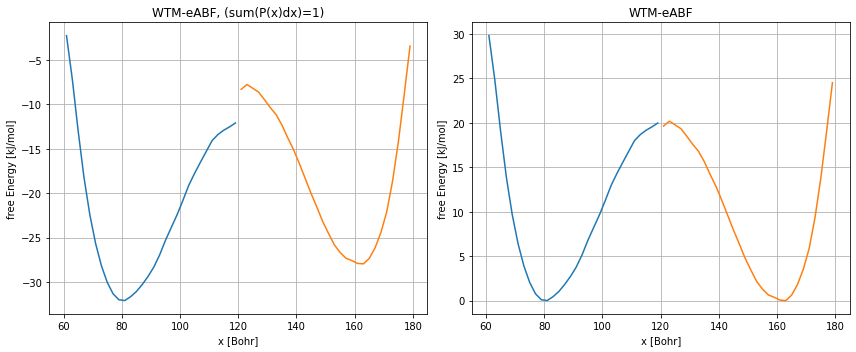

In [9]:
plt.rcParams["figure.figsize"] = [12,5]
fig, axs = plt.subplots(ncols=2)
axs[0].plot(xxx1, meABF_F1)
axs[0].plot(xxx2, meABF_F2)
axs[1].plot(xxx1, meABF_F1-meABF_F1.min())
axs[1].plot(xxx2, meABF_F2-meABF_F2.min())
axs[0].grid()
axs[1].grid()
axs[0].set_xlabel('x [Bohr]')
axs[1].set_xlabel('x [Bohr]')
axs[0].set_ylabel('free Energy [kJ/mol]')
axs[1].set_ylabel('free Energy [kJ/mol]')
axs[0].set_title('WTM-eABF, (sum(P(x)dx)=1)')
axs[1].set_title('WTM-eABF')
plt.tight_layout()
plt.savefig("meta_eABF_P1_windows.png", dpi=400)
plt.show()
plt.close()

WTM_1 = np.loadtxt('WTM/bias_out_1.dat', skiprows=1)
WTM_2 = np.loadtxt('WTM/bias_out_2.dat', skiprows=1)
x1 = WTM_1[:,0]
WTM_F1 = get_F(WTM_1[:,3], x1)
x2 = WTM_2[:,0]
WTM_F2 = get_F(WTM_2[:,3], x2)

plt.rcParams["figure.figsize"] = [12,5]
fig, axs = plt.subplots(ncols=2)
axs[0].plot(x1, WTM_F1)
axs[0].plot(x2, WTM_F2)
axs[1].plot(x1, WTM_F1-WTM_F1.min())
axs[1].plot(x2, WTM_F2-WTM_F2.min())
axs[0].grid()
axs[1].grid()
axs[0].set_xlabel('x [Bohr]')
axs[1].set_xlabel('x [Bohr]')
axs[0].set_ylabel('free Energy [kJ/mol]')
axs[1].set_ylabel('free Energy [kJ/mol]')
axs[0].set_title('WTM, (sum(P(x)dx)=1)')
axs[1].set_title('WTM')
plt.tight_layout()
plt.savefig("WTM_P1_windows.png", dpi=400)
plt.show()
plt.close()

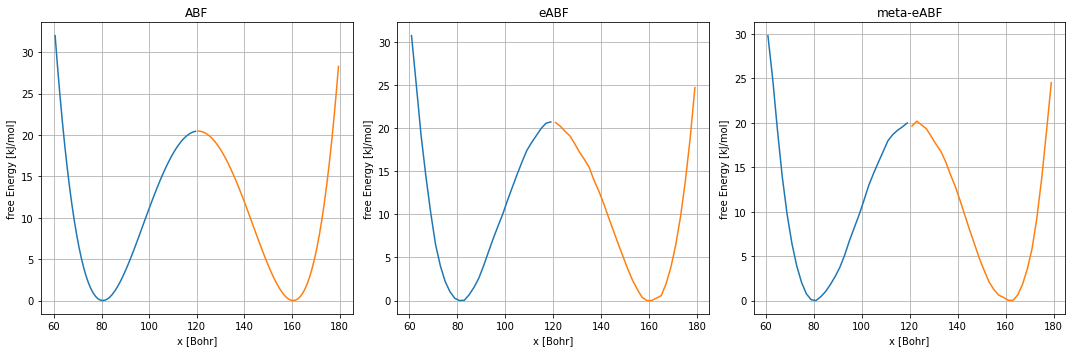

In [12]:
plt.rcParams["figure.figsize"] = [15,5]
fig, axs = plt.subplots(ncols=3)
axs[0].plot(x1, ABF_F1-ABF_F1.min())
axs[0].plot(x2, ABF_F2-ABF_F2.min())
axs[1].plot(xx1, eABF_F1-eABF_F1.min())
axs[1].plot(xx2, eABF_F2-eABF_F2.min())
axs[2].plot(xxx1, meABF_F1-meABF_F1.min())
axs[2].plot(xxx2, meABF_F2-meABF_F2.min())
axs[0].grid()
axs[1].grid()
axs[2].grid()
axs[0].set_xlabel('x [Bohr]')
axs[1].set_xlabel('x [Bohr]')
axs[2].set_xlabel('x [Bohr]')
axs[0].set_ylabel('free Energy [kJ/mol]')
axs[1].set_ylabel('free Energy [kJ/mol]')
axs[2].set_ylabel('free Energy [kJ/mol]')
axs[0].set_title('ABF')
axs[1].set_title('eABF')
axs[2].set_title('meta-eABF')
plt.tight_layout()
plt.savefig("P1_windows.png", dpi=400)
plt.show()
plt.close()